Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?

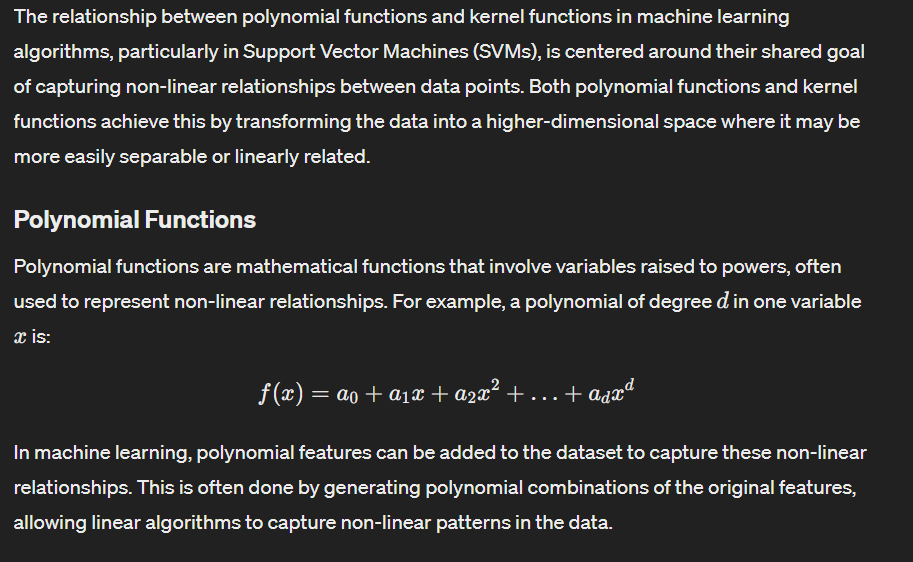
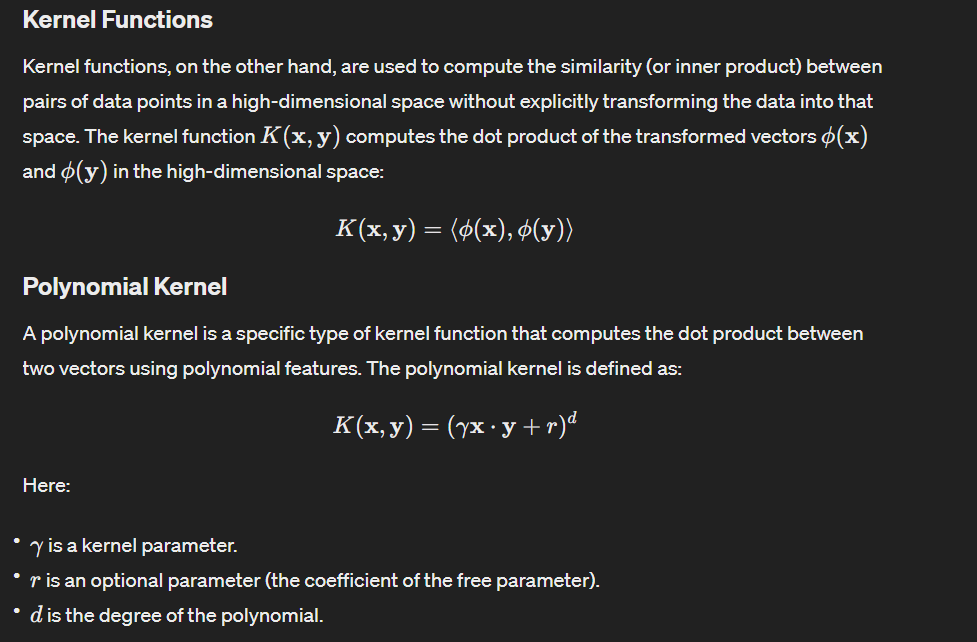
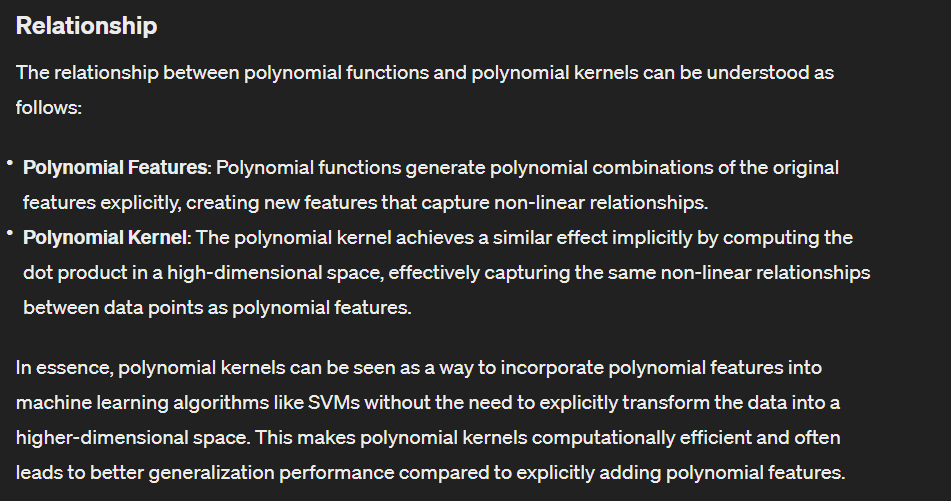

Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

Accuracy of SVM with Polynomial Kernel: 0.8000


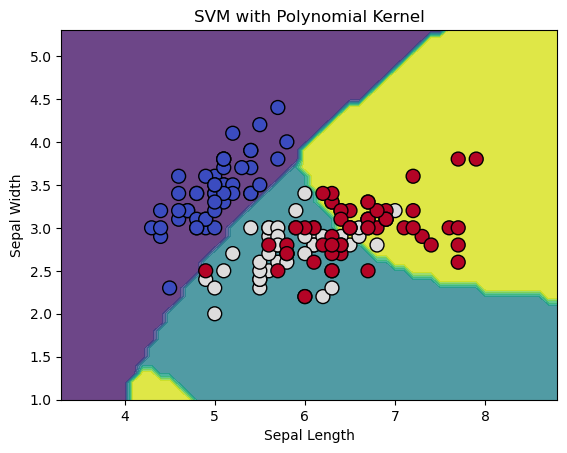

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We use only two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize SVM classifier with polynomial kernel
clf = SVC(kernel='poly', degree=3, gamma='auto', coef0=1, C=1.0)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM with Polynomial Kernel: {accuracy:.4f}')

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the labels for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=100)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM with Polynomial Kernel')
plt.show()



Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In Support Vector Regression (SVR), the parameter 
ϵ (epsilon) controls the width of the margin within which no penalty is associated in the loss function. This margin is often referred to as the "tube." SVR aims to fit as many data points as possible inside this tube while minimizing the error for points outside the tube.

Effect of 
ϵ on Support Vectors
Smaller 
ϵ:

A smaller value of 
ϵ creates a narrower tube.
The SVR model becomes more sensitive to errors.
More support vectors are likely to be inside the tube or even outside the tube if the errors are large.
Larger 
ϵ:

A larger value of 
ϵ creates a wider tube.
The SVR model becomes less sensitive to errors.
Fewer support vectors are likely to be inside the tube, and more points may be considered as support vectors, including those that lie outside the tube.

Relationship between 
ϵ and Number of Support Vectors
Increasing 
ϵ generally leads to:

A larger number of support vectors.
A model that is less sensitive to individual data points, resulting in a smoother fit.
Potentially better generalization to new data if the original data has noise or outliers.
Decreasing 
ϵ generally leads to:

A smaller number of support vectors.
A model that is more sensitive to individual data points, resulting in a fit that closely follows the training data.
Potentially overfitting to the training data, especially if the data has noise or outliers.
Summary


Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?

1. Kernel Function
SVR uses kernel functions to transform the input features into a higher-dimensional space, allowing the algorithm to capture non-linear relationships. Common kernel functions include:

Linear: Suitable for linearly separable data or when you suspect that the relationship between features and target is linear.
Polynomial: Suitable for data with polynomial relationships.
Radial Basis Function (RBF): Suitable for non-linear data with complex relationships.
Effect: The choice of kernel function can significantly impact the model's ability to fit the training data and generalize to new data.

Example:

Use RBF kernel for non-linear data.
Use Linear kernel for linear relationships.
2. C Parameter
The C parameter controls the trade-off between maximizing the margin and minimizing the error. A smaller C leads to a softer margin and allows more margin violations, while a larger C leads to a harder margin and penalizes margin violations more heavily.

Effect:

Smaller C: More regularization, simpler model, less likely to overfit but may underfit.
Larger C: Less regularization, more complex model, more likely to overfit but may capture more details in the data.
Example:

Increase C if the model is underfitting.
Decrease C if the model is overfitting.
3. Epsilon Parameter (
ϵ)
The epsilon parameter controls the width of the margin (tube) within which no penalty is associated in the loss function.

Effect:

Smaller 
ϵ: Narrower tube, more sensitive to errors.
Larger 
ϵ: Wider tube, less sensitive to errors.
Example:

Increase 
ϵ if the model is too sensitive to outliers.
Decrease 
ϵ if you want the model to be more sensitive to errors.
4. Gamma Parameter
The gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.

Effect:

Smaller gamma: Larger similarity radius, smoother decision boundary.
Larger gamma: Smaller similarity radius, more complex decision boundary, may lead to overfitting.
Example:

Increase gamma for complex, non-linear data.
Decrease gamma for simpler, more linear data.


Q5. Assignment:
* Import the necessary libraries and load the dataseg
* Split the dataset into training and testing setZ
* Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
* Create an instance of the SVC classifier and train it on the training datW
* Use the trained classifier to predict the labels of the testing datW
* Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
precision, recall, F1-scoreK
* Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
improve its performanc_
* Train the tuned classifier on the entire dataseg
* Save the trained classifier to a file for future use.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc = SVC()

# Train the classifier on the training data
svc.fit(X_train_scaled, y_train)


# Predict the labels for the testing data
y_pred = svc.predict(X_test_scaled)

# Evaluate the performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


# Define the grid of hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5]
}

# Create GridSearchCV instance
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Train the tuned classifier on the entire dataset
best_svc = grid_search.best_estimator_
best_svc.fit(X_train_scaled, y_train)

# Save the trained classifier to a file
joblib.dump(best_svc, 'best_svc_iris.pkl')
print('Trained classifier saved to best_svc_iris.pkl')


Accuracy: 1.0000
Best Hyperparameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Trained classifier saved to best_svc_iris.pkl
